In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

In [22]:
df = pd.read_csv('HR_comma_sep.csv')
df
# df_copy= df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
print(df.shape)
df.isna().any()

(14999, 10)


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

# EDA and Visualization

In [24]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [46]:
# df.groupby('left').mean() is going to  be deprecated.
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


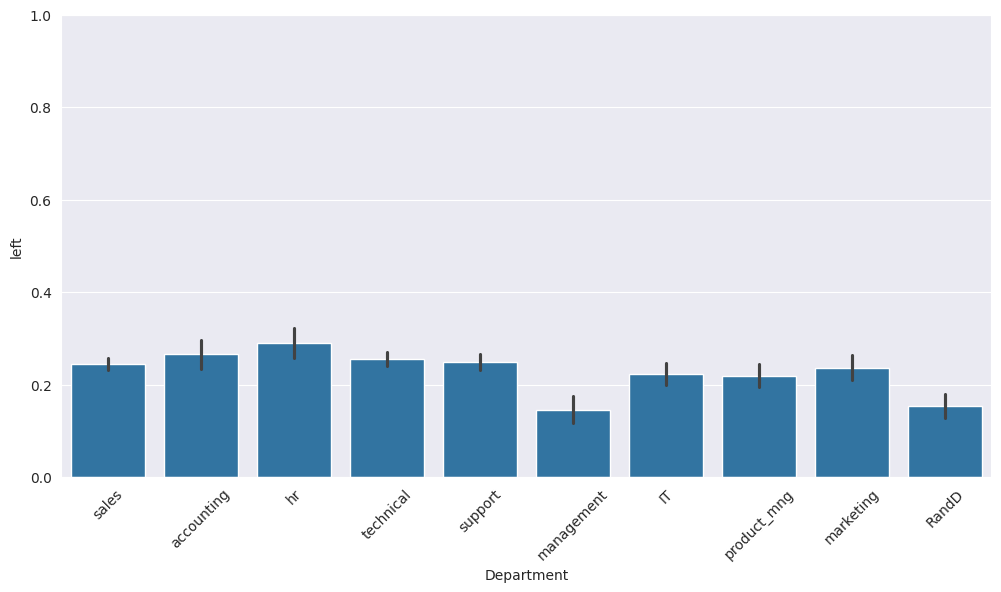

In [39]:
plt.figure(figsize=(12,6))
sns.barplot(x= 'Department', y='left', data= df)
# Set y-axis limits
plt.ylim(0, 1)

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='salary'>

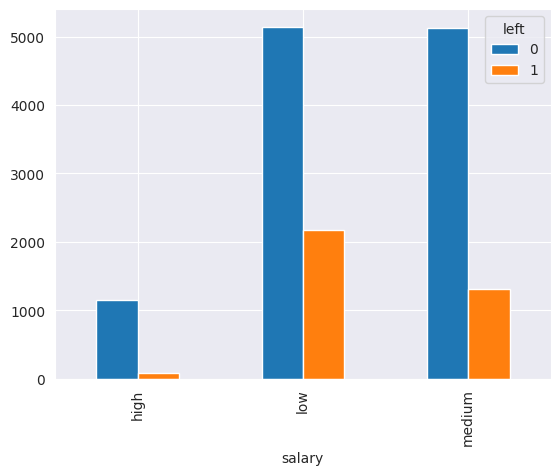

In [56]:
# sns.barplot(x= 'salary',y='left',data=df)
# Create the crosstab DataFrame
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [27]:
# plt.figure(figsize=(10,6))
# correlation_matrix = df.drop(['Department','salary'],axis=1).corr()
# # sns.heatmap(data =df.drop(['Department','salary'],axis=1))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

In [28]:
cat_col = [c_name for c_name in df.columns if df[c_name].dtype not in ['int','float']]
cat_col
cat_col_ord= [cname for cname in df.columns if df[cname].nunique() <4 and 
                        df[cname].dtype == "object"]
cat_col_lab_one= [cname for cname in df.columns if 3 < df[cname].nunique() < 11 and 
                        df[cname].dtype == "object"]
print(cat_col_ord)
print(cat_col_lab_one)

['salary']
['Department']


In [29]:
# df_dep_uniques= df['Department'].unique()
# print(df_dep_uniques)
# df_sal_uniques = df['salary'].unique()
# print(df_sal_uniques)

# Split

In [30]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [31]:
y= df['left']
X= df.drop('left',axis=1)
X_train,X_valid,y_train, y_valid = train_test_split(X,y,test_size=0.2,random_state=10)

In [32]:
# lb = LabelEncoder()
# lb_col = df['salary']
# lb_col = lb.fit_transform(lb_col)
# lb_df = pd.DataFrame(lb_col)
# lb_df.columns = lb_df.columns.astype(str)
# lb_df.columns = lb_df.columns +"_S"
# lb_df

In [33]:
# ord = OrdinalEncoder()
# ord_col= np.array(df['Department']).reshape(-1,1)
# ord_col = ord.fit_transform(ord_col)
# ord_col
# ohe = OneHotEncoder()
# ohe_col = ohe.fit_transform(ord_col).toarray()
# ohe_col
# ohe_df = pd.DataFrame(ohe_col)
# ohe_df
# new_ohe_df = ohe_df.drop(9,axis=1)
# new_ohe_df.columns = new_ohe_df.columns.astype(str)
# new_ohe_df.columns =[ i+"_D" for i in new_ohe_df.columns]
# new_ohe_df.columns
# new_ohe_df

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

class MyLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        
    def fit(self, X, y=None):
        self.label_encoder.fit(X)
        return self
    
    def transform(self, X):
        return self.label_encoder.transform(X).reshape(-1, 1)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
ord_transformer =Pipeline(steps=[(
    "ordinalencoder",OrdinalEncoder())])
lab_one_transformer= Pipeline(steps=[
   
    ('label',MyLabelEncoder()),
    ('onehotencoder',OneHotEncoder())
])
preprocessor = ColumnTransformer(transformers=[
    ('ord',ord_transformer,cat_col_ord),
    ('lab_one',lab_one_transformer,cat_col_lab_one)
])

In [36]:
lr_model = LogisticRegression()
my_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('lr_model',lr_model)])
print(X_train.shape)
print(y_train.shape)
my_pipeline.fit(X_train, y_train)

(11999, 9)
(11999,)


/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['salary']),
                                                 ('lab_one',
                                                  Pipeline(steps=[('label',
                                                                   MyLabelEncoder()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Department'])])),
                ('lr_model', LogisticRegression())])

In [58]:
from sklearn.metrics import mean_absolute_error

preds = my_pipeline.predict(X_valid)
real_score= my_pipeline.score(X_valid,y_valid)
print(f'Score:{real_score}')
# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

Score:0.7553333333333333
MAE: 0.24466666666666667


/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [38]:
# from sklearn.feature_selection import SelectKBest, chi2
# # from sklearn.ensemble import RandomForestClassifier
# 
# KBest = SelectKBest(chi2, k="all")
# X_train = KBest.fit_transform(X_train, y_train)
# X_test = KBest.transform(X_valid)
# 
# 
# 
# lr_model.fit(X_train,y_train)
# 
# lr_model.score(X_test, y_valid)

In [57]:
lr_model.score(X_valid,y_valid)

/home/zahra/Projects/Training/Ml/venv/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'sales'